# Data project 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import ipywidgets as widgets
import os
import seaborn as sns

%load_ext autoreload
%autoreload 2

# local modules
import dataproject

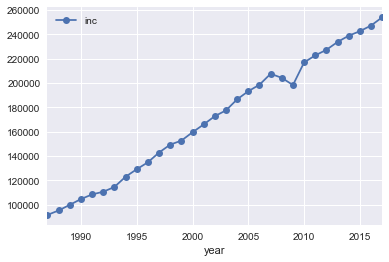

In [9]:
# a. Load
inc = pd.read_excel('average_income.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
inc.rename(columns = {str(i): f'inc{i}' for i in range(1987,2018)}, inplace=True)
inc.drop(inc.tail(2).index, inplace=True) # Delete last 2 rows

# c. remove regions
I = inc.municipality.str.contains('Landsdel', 'Hele landet')
inc.loc[I, :]
inc = inc.loc[I == False] # Keeps everything besides region

# d. change to long format
inc_tall = pd.wide_to_long(inc, stubnames='inc', i='municipality', j='year')
inc_tall = inc_tall.reset_index()

# e. create interactive figure
def plot_e(dataframe, municipality):
    I = dataframe['municipality'] == municipality
    ax=dataframe.loc[I,:].plot(x='year', y='inc', style='-o', legend='False')

widgets.interact(plot_e, 
    dataframe = widgets.fixed(inc_tall), 
    municipality = widgets.Dropdown(description='municipality', options=inc_tall.municipality.unique(), value='Greve')
);

In [10]:
# a. Find mean throughout entire period
inc_mean = inc_tall.groupby('municipality')['inc'].agg(lambda x: x.mean())
inc_mean.name = 'Average_income'

# b. Add average income to dataframe
inc_ = inc_tall.set_index('municipality').join(inc_mean, how='left')
inc_

# c. Filter the data to contain just year == 2018
inc_2017 = inc_[inc_.year==2017]

# d. Find 5 smallest and largest
smallest = inc_2017.nsmallest(5, 'Average_income')
largest = inc_2017.nlargest(5, 'Average_income')

# e. remove all besides the 10 municipalities
indexnames = inc_[ (inc_['Average_income'] >= 133700) & (inc_['Average_income'] <= 191600) ].index
inc_.drop(indexnames, inplace=True)

In [14]:
inc_.reset_index(inplace=True)
inc_['diff'] = inc_.inc - inc_.Average_income
inc_.reset_index(inplace=True)

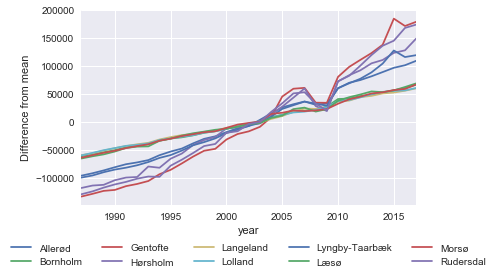

In [12]:
fig = plt.figure()
ax = plt.subplot(111)
inc_.set_index('year').groupby('municipality')['diff'].plot(kind='line', legend=True, ax=ax);
ax.set_ylabel('Difference from mean')
box = ax.get_position() # find plot coordinates 
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9]) # shrink height by 10% at bottom 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # Put a legend below current axis

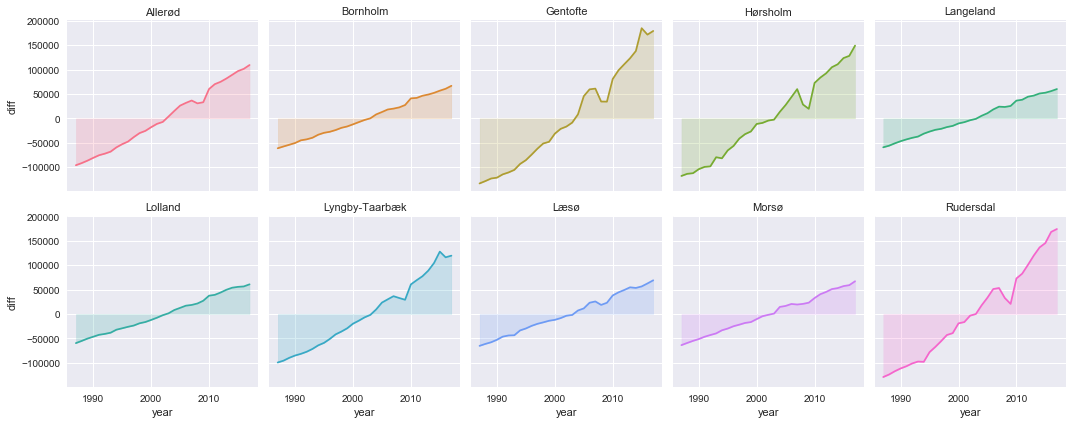

In [13]:
by_var = 'municipality'
y_var = 'diff'

g = sns.FacetGrid(inc_, col=by_var, hue=by_var, col_wrap=5)
g = g.map(plt.plot, 'year', y_var) # draw the upper line
g = g.map(plt.fill_between, 'year', y_var, alpha=0.2).set_titles('{col_name}' +by_var)
g = g.set_titles('{col_name}')

In [1]:
import pandas_datareader as web
import datetime
import pydst

In [2]:
Dst = pydst.Dst(lang='en')

In [ ]:
Dst.get_subjects()

In [ ]:
Dst.get_tables(subjects=['03']).sample(20)

In [11]:
Dst.get_data(table_id='HFUDD10')

,BOPOMR,HERKOMST,HFUDD,ALDER,KØN,TID,INDHOLD
0,All Denmark,Total,Total,"Age, total",Total,2006,3833359


In [12]:
indk_vars = Dst.get_variables(table_id='HFUDD10')

In [13]:
indk_vars

,id,text,elimination,time,map,values
0,BOPOMR,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,HERKOMST,ancestry,True,False,NaN,"[{'id': 'TOT', 'text': 'Total'}, {'id': '5', '..."
2,HFUDD,highest education completed,True,False,NaN,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'H10',..."
3,ALDER,age,True,False,NaN,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
4,KØN,sex,True,False,NaN,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
5,Tid,time,False,True,NaN,"[{'id': '2006', 'text': '2006'}, {'id': '2007'..."


In [422]:
educ = Dst.get_data(table_id = 'HFUDD10', variables={'BOPOMR':['157','173','201','223','230','400','360','482','825','773'], 'HFUDD':['*'], 'Tid':[str(i)]})

In [425]:
test = pd.DataFrame(Byer_list)

In [402]:
educ
    drop_these = ['KØN', 'ALDER', 'HERKOMST']
    educ.drop(drop_these, axis=1, inplace=True)

,BOPOMR,HFUDD,TID,HERKOMST,ALDER,KØN,INDHOLD
0,Bornholm,"H3010 Care, health and education (OSP)",2016,Total,"Age, total",Total,1545
1,Lyngby-Taarbæk,"H7039 Social Sciences, MASTER",2016,Total,"Age, total",Total,2995
2,Hørsholm,"H7039 Social Sciences, MASTER",2016,Total,"Age, total",Total,1467
3,Morsø,"H7039 Social Sciences, MASTER",2016,Total,"Age, total",Total,80
4,Lyngby-Taarbæk,"H3040 The technology area, power and electroni...",2016,Total,"Age, total",Total,382
...,...,...,...,...,...,...,...
11643,Morsø,"H8090 Health science, PhD",2019,Total,"Age, total",Total,1
11644,Morsø,"H8097 Higher education not specified, PhD",2019,Total,"Age, total",Total,14
11645,Morsø,H90 Not stated,2019,Total,"Age, total",Total,175
11646,Morsø,H9099 Not stated,2019,Total,"Age, total",Total,175


In [372]:
educ
drop_these = ['KØN', 'ALDER', 'HERKOMST']
educ.drop(drop_these, axis=1, inplace=True)

In [373]:
educ

,BOPOMR,HFUDD,TID,INDHOLD
0,Bornholm,"H3010 Care, health and education (OSP)",2016,1545
1,Lyngby-Taarbæk,"H7039 Social Sciences, MASTER",2016,2995
2,Hørsholm,"H7039 Social Sciences, MASTER",2016,1467
3,Morsø,"H7039 Social Sciences, MASTER",2016,80
4,Lyngby-Taarbæk,"H3040 The technology area, power and electroni...",2016,382
...,...,...,...,...
11643,Morsø,"H8090 Health science, PhD",2019,1
11644,Morsø,"H8097 Higher education not specified, PhD",2019,14
11645,Morsø,H90 Not stated,2019,175
11646,Morsø,H9099 Not stated,2019,175


In [375]:
educ.rename(columns= {'BOPOMR':'municipality'}, inplace=True)
educ.rename(columns= {'HFUDD':'education'}, inplace=True)
educ.rename(columns= {'TID':'year'}, inplace=True)
educ.rename(columns= {'INDHOLD':'total'}, inplace=True)


In [376]:
educ['total'] = educ['total'].astype(int)
Tot_pop = educ.groupby(['municipality','year'])['total'].agg(lambda x: x.sum())

Tot_pop
#educ_pop = educ.set_index('municipality').join(Tot_pop, how='left')

Tot_pop.reset_index()


,municipality,year,total
0,Allerød,2006,48270
1,Allerød,2007,48444
2,Allerød,2008,48018
3,Allerød,2009,48480
4,Allerød,2010,49041
...,...,...,...
135,Rudersdal,2015,108294
136,Rudersdal,2016,108573
137,Rudersdal,2017,108702
138,Rudersdal,2018,107775


In [338]:
Tot_pop

municipality  year
Allerød       2006     5332
              2007     5482
              2008     5470
              2009     5634
              2010     5984
                      ...  
Rudersdal     2015    16444
              2016    16782
              2017    17032
              2018    16950
              2019    17466
Name: total, Length: 140, dtype: int64

In [318]:
inc_.reset_index(inplace=True)

inc_['diff'] = inc_.inc - inc_.Average_income

inc_ = inc_combine.sort_values(['municipality','year'])

inc_.reset_index(inplace=True)

# Stock data

In [2]:
import datetime as dt
from pandas_datareader import data

In [4]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,1,1)

In [19]:
# Apple
appl = data.DataReader('AAPL', start=start, end=end,data_source='yahoo')
appl['firm'] = 'Apple'

# Amazon
amzn = data.DataReader('AMZN', start=start, end=end,data_source='yahoo')
amzn['firm'] = 'Amazon'

# Google
googl = data.DataReader('GOOGL', start=start, end=end,data_source='yahoo')
googl['firm'] = 'Google'


In [22]:
stocks = pd.concat([appl,amzn,googl])

stocks.index = pd.to_datetime(stocks.index)

firm
Amazon    AxesSubplot(0.125,0.2;0.775x0.68)
Apple     AxesSubplot(0.125,0.2;0.775x0.68)
Google    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

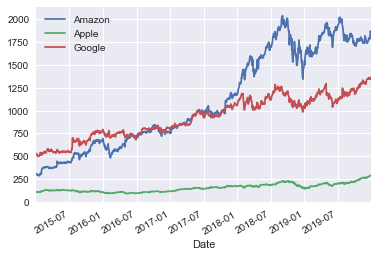

In [26]:
stocks.groupby('firm').mean()
fig,ax = plt.subplots()
stocks.groupby('firm')['Close'].plot(legend=True)

In [27]:
stocks.groupby('firm').mean()

,High,Low,Open,Close,Volume,Adj Close
firm,,,,,,
Amazon,1125.483315,1103.547640,1115.492544,1115.047337,4.190136e+06,1115.047337
Apple,155.756200,153.075008,154.397377,154.476566,3.589995e+07,149.094641
Google,934.832909,918.785700,927.013609,927.082202,1.863055e+06,927.082202


In [ ]:
# a. load
empl = pd.read_excel('RAS200.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True)

# c. rename columns
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [ ]:
empl.head()

**Remove all rows which are not municipalities**:

In [ ]:
empl = dataproject.only_keep_municipalities(empl)
empl.head()

**Convert the dataset to long format**:

In [ ]:
# a. rename year columns
mydict = {str(i):f'employment{i}' for i in range(2008,2018)}
empl.rename(columns = mydict, inplace=True)

# b. convert to long
empl_long = pd.wide_to_long(empl, stubnames='employment', i='municipality', j='year').reset_index()

# c. show
empl_long.head()

## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

In [ ]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [ ]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [ ]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [ ]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [ ]:
merged.groupby('year').agg(['mean','std']).round(2)

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.